# Data Science and Analysis Final Project - Nearest Earth Object Analysis
## By Nuha Rashad

Link to dataset: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects/data

This dataset is in Excel, and it has 10 columns and 27,423 unique rows/values. The purpose of this project is to do preliminary and secondary analysis of the objects surrounding out planet in order to gain a deeper understanding of their states and whether they are hazardous or not.

Summary of the project and what to expect in this file:

1) Importing libraries and reading the csv file.
2) Reading the original dataset.
3) Analyzing and creating visuals for the original dataset.
4) Cleaning the dataset and creating new columns.
5) Analyzing the new dataset.

## Importing Necessary Python Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the csv file 

This file's name is neo.csv, which stands for "near Earth objects". After cleaning the dataset, there are 9 columns and 17,735 rows. The values in this dataset are primarily of the types int, float64, and boolean. 

In [5]:
df = pd.read_csv("neo.csv")

## Type of Dataset

In [6]:
type(df)

pandas.core.frame.DataFrame

## Basic Information About the Dataset

From these functions, we learn that there are 90,836 primary entries and that there are a total of 10 columns. We also learn of the names od the columns, the number of non-null elements, as well as the datatype of all of the unique columns.

In [7]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


## Basic Statistics of the Dataset

In [8]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


## Bar Graph Visualizing the Number of Hazardous vs NonHazardous Objects

In order to accurately count the number of hazardous and nonhazardous objects in this dataset, loops are used to interate through the column and keep count of the boolean values relating to the type of objects. It is determined that there are 8,840 hazardous objects and 81,996 nonhazardous objects.

Hazardous:  8840
Non-hazardous:  81996


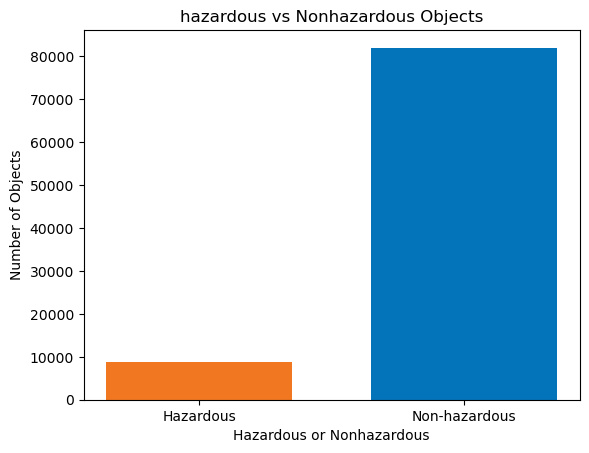

In [31]:
hazardous_count = 0
non_hazardous_count = 0

for value in df['hazardous']:
    if value == True:
        hazardous_count+= 1
    else:
        non_hazardous_count+= 1

print('Hazardous: ', hazardous_count)
print('Non-hazardous: ', non_hazardous_count)

categories = ['Hazardous', 'Non-hazardous']
counts = [hazardous_count, non_hazardous_count]

plt.bar(categories, counts, color = ["#F17720", '#0474ba'], width = 0.7)
plt.xlabel("Hazardous or Nonhazardous")
plt.ylabel("Number of Objects")
plt.title("Hazardous vs Nonhazardous Objects")
plt.show()

## Pie Chart Visualizing the Number of Hazardous vs Nonhazardous Objects

A pie chart is created to visualize the percentage of objects that are hazardous and nonhazardous. It is determined that the vast majority of the objects are nonhazardous; 90.3% of all objects are nonhazardous while 9.7% are hazardous.

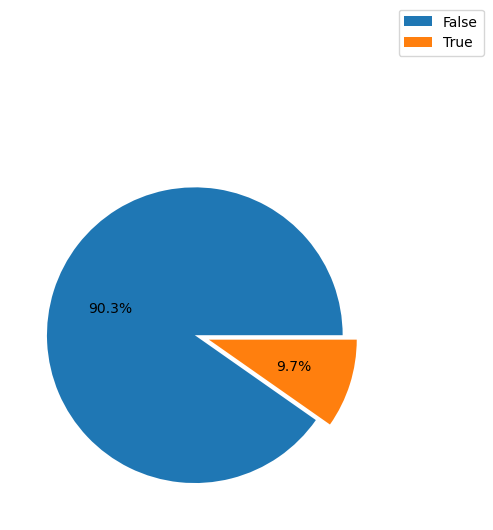

In [12]:
pc = df.groupby(['hazardous']).size().reset_index(name='counts')
piechart = plt.pie(a['counts'],
                  radius = 1.0,
                  autopct='%1.1f%%',
                  explode=[0.0, 0.1])
plt.legend(labels=a['hazardous'], bbox_to_anchor=(1.3, 1.4))

## Scatter Plot Determining the Correlation Between Minimum Diameter and Velocity

We find that there is no correlation between minimum diameter and velocity.

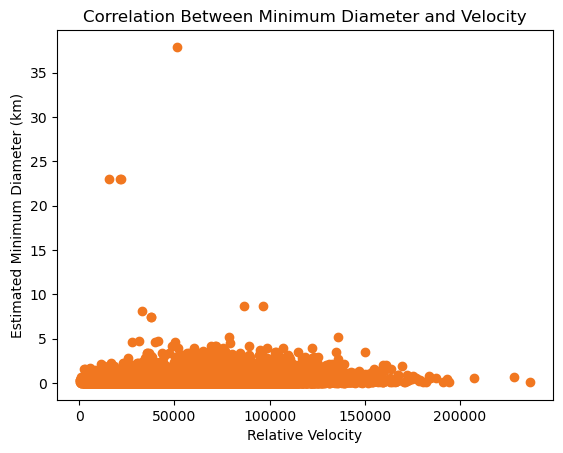

In [46]:
plt.xlabel("Relative Velocity")
plt.ylabel("Estimated Minimum Diameter (km)")
plt.title("Correlation Between Minimum Diameter and Velocity")
plt.scatter(df['relative_velocity'],
           df['est_diameter_min'],
           color = "#F17720")

## Scatter Plot Determining the Correlation Between Maximmum Diameter and Velocity

We find that there is no correlation between maximum diameter and velocity.

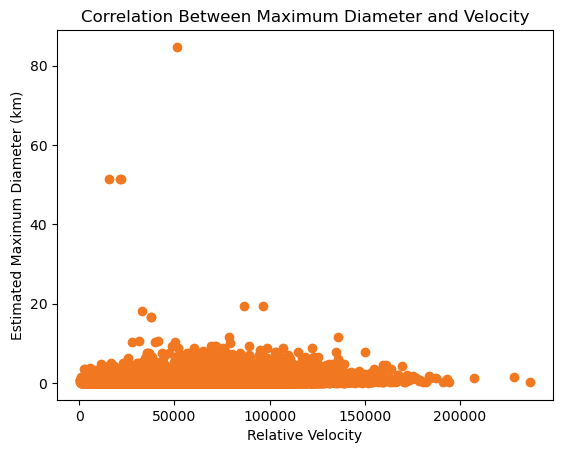

In [47]:
plt.xlabel("Relative Velocity")
plt.ylabel("Estimated Maximum Diameter (km)")
plt.title("Correlation Between Maximum Diameter and Velocity")
plt.scatter(df['relative_velocity'],
           df['est_diameter_max'],
           color = "#F17720")

## Scatter Plot Determining the Correlation Between Minimum Diameter and Distance Missed

We find that there is no correlation between minimum diameter and distance missed.

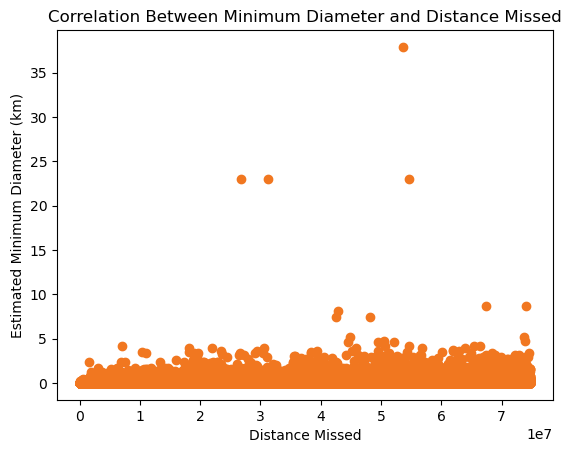

In [61]:
plt.xlabel("Distance Missed")
plt.ylabel("Estimated Minimum Diameter (km)")
plt.title("Correlation Between Minimum Diameter and Distance Missed")
plt.scatter(df['miss_distance'],
           df['est_diameter_min'],
           color = "#F17720")

## Scatter Plot Determining the Correlation Between Maximum Diameter and Distance Missed

We find that there is no correlation between maximum diameter and distance missed.

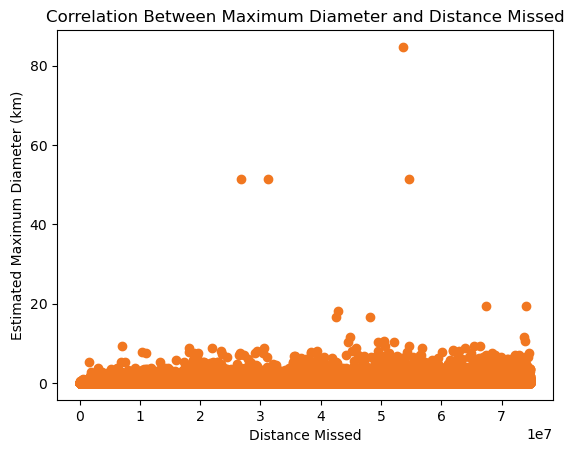

In [62]:
plt.xlabel("Distance Missed")
plt.ylabel("Estimated Maximum Diameter (km)")
plt.title("Correlation Between Maximum Diameter and Distance Missed")
plt.scatter(df['miss_distance'],
           df['est_diameter_max'],
           color = "#F17720")

## Box Plot to Identify Outliers in the Minimum and Maximum Diameters

We find that there are significant outliers that are impacting the data in both the minimum diameter and maximum diameter columns. These columns will need to be cleaned in order for the data to be usable.

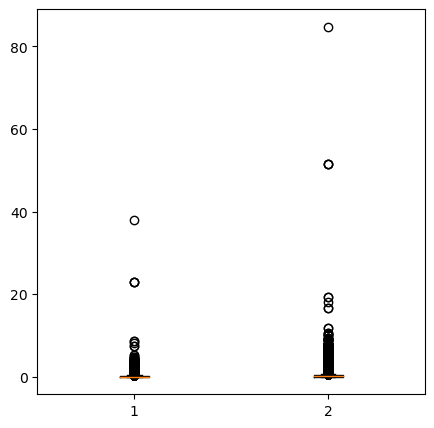

In [58]:
bp_data_diameter = [df['est_diameter_min'], df['est_diameter_max']]
fig = plt.figure(figsize =(5, 5))
plt.boxplot(bp_data_diameter)
plt.show()

## Box Plot to Identify Outliers in the Velocity

It is made clear that there are many outliers in the relative velocity column that will need to be cleaned in order for the data to be usable. 

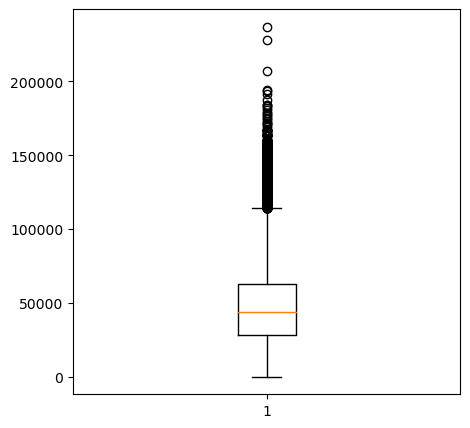

In [60]:
bp_data_velocity = [df['relative_velocity']]
fig = plt.figure(figsize =(5, 5))
plt.boxplot(bp_data_velocity)
plt.show()

## Box Plot to Identify Outliers in the Miss Distance

It is made clear that there are no outliers in the miss distance column, meaninf that this data will not need to be manipulated or cleaned in order for ut to be usable. 

Interpretation:
Median distance for missed objects: 1.75 le7 to 5.5 le7 km from Earth.

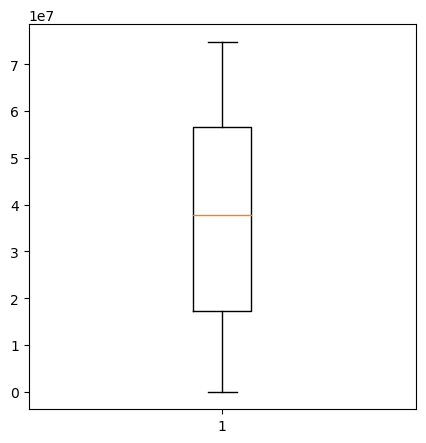

In [66]:
bp_data_missed = [df['miss_distance']]
fig = plt.figure(figsize =(5, 5))
plt.boxplot(bp_data_missed)
plt.show()

## Checking for Null Values in the Minimum Diameter and Maximum Diameter Columns

We see from the analysis conducted on estimated minimum diameter and estimated maximum diameter that there were no null values present in these columns.

In [67]:
min_diameter_null = df['est_diameter_min'].isnull().sum()
print("Total null values in the minimum diameter column: ", min_diameter_null)
print(df['est_diameter_min'])

Total null values in the minimum diameter column:  0
0        1.198271
1        0.265800
2        0.722030
3        0.096506
4        0.255009
           ...   
90831    0.026580
90832    0.016771
90833    0.031956
90834    0.007321
90835    0.039862
Name: est_diameter_min, Length: 90836, dtype: float64


In [68]:
max_diameter_null = df['est_diameter_max'].isnull().sum()
print("Total null values in the maximum diameter column: ", max_diameter_null)
print(df['est_diameter_max'])

Total null values in the minimum diameter column:  0
0        2.679415
1        0.594347
2        1.614507
3        0.215794
4        0.570217
           ...   
90831    0.059435
90832    0.037501
90833    0.071456
90834    0.016370
90835    0.089133
Name: est_diameter_max, Length: 90836, dtype: float64


## Checking for Null Values in the Relative Velocity, Miss Distance, and Hazardous Columns

We see from the analysis conducted on relative velocity, missed distance, and hazardous columns that there were no null values present in these columns.

In [70]:
velocity_null = df['relative_velocity'].isnull().sum()
print("Total null values in the velocity column: ", velocity_null)
print(df['relative_velocity'])

Total null values in the velocity column:  0
0         13569.249224
1         73588.726663
2        114258.692129
3         24764.303138
4         42737.733765
             ...      
90831     52078.886692
90832     46114.605073
90833      7566.807732
90834     69199.154484
90835     27024.455553
Name: relative_velocity, Length: 90836, dtype: float64


In [71]:
miss_distance_null = df['miss_distance'].isnull().sum()
print("Total null values in the missed distance column: ", miss_distance_null)
print(df['miss_distance'])

Total null values in the missed distance column:  0
0        5.483974e+07
1        6.143813e+07
2        4.979872e+07
3        2.543497e+07
4        4.627557e+07
             ...     
90831    1.230039e+07
90832    5.432121e+07
90833    2.840077e+07
90834    6.869206e+07
90835    5.977213e+07
Name: miss_distance, Length: 90836, dtype: float64


In [72]:
hazardous_null = df['hazardous'].isnull().sum()
print("Total null values in the hazardous column: ", hazardous_null)
print(df['hazardous'])

Total null values in the hazardous column:  0
0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool


## Dropping Orbit Body and Sentry Object Columns

Dropping unnecessary columns that are not needed for analysis.

In [105]:
cdf = df.drop([
    'orbiting_body', 'sentry_object'
],
        axis=1)
print(cdf.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'absolute_magnitude',
       'hazardous'],
      dtype='object')


## Dropping Duplicate Values

Duplicate values in the code will be dropped by interating through the name column and deleting rows that have the same names and one another. This is done in order to avoid redundancies in the data and to allow for more accurate results and analysis.

In [125]:
cdf = df.drop_duplicates(subset = 'name')

## Dropping Outliers 

Outliers in the minimum diameter, maximum diameter, and relative velocity columns will be dropped in order for more accurate analysis.

In [138]:
cdf = cdf.drop(cdf[cdf['est_diameter_min'] > 0.097].index)
cdf = cdf.drop(cdf[cdf['est_diameter_max'] > 0.20].index)
cdf = cdf.drop(cdf[cdf['relative_velocity'] > 97000.0].index)

## Basic Information About the Cleaned Dataset

After dropping columns, checking for null values, removing duplicates, and deleting outliers, we are left with a cleaned dataset with 17,212 rows that are ready to be analyzed. 

In [140]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17212 entries, 5 to 90439
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    17212 non-null  int64  
 1   name                  17212 non-null  object 
 2   est_diameter_min      17212 non-null  float64
 3   est_diameter_max      17212 non-null  float64
 4   est_average_diameter  17212 non-null  float64
 5   relative_velocity     17212 non-null  float64
 6   miss_distance         17212 non-null  float64
 7   orbiting_body         17212 non-null  object 
 8   sentry_object         17212 non-null  bool   
 9   absolute_magnitude    17212 non-null  float64
 10  hazardous             17212 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 1.3+ MB


## Box Plot for Minimum Diameter and Maximum Diameter

After cleaning the data, we see that the median minimum diameter is between 0.010 and 0.040 kilometers. We also see that the range of median values for the maximum diameter is greater than the range for the minimum diameter, as it ranges between 0.030 and 0.0950 kilometers.

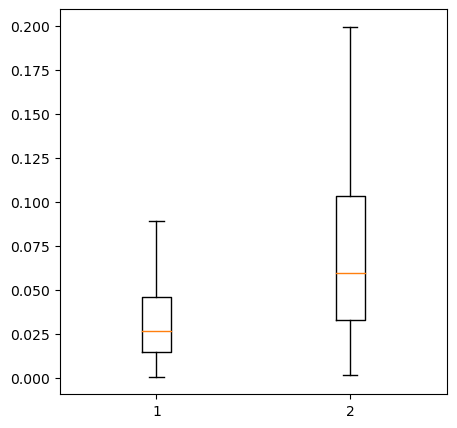

In [139]:
bp_data_dia = [cdf['est_diameter_min'], cdf['est_diameter_max']]
fig = plt.figure(figsize =(5, 5))
plt.boxplot(bp_data_dia)
plt.show()

## Box Plot for Relative Velocity

After cleaning the data, a box plot has been created to identify the relative velocity of objects near Earth. We see that the median values are between approximately 22,000 and 55,000 km/hour.

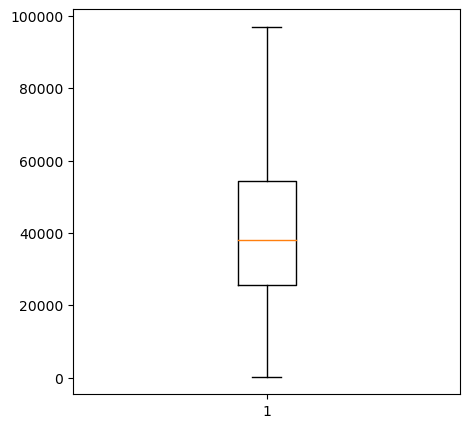

In [110]:
bp_data_velo = [cdf['relative_velocity']]
fig = plt.figure(figsize =(5, 5))
plt.boxplot(bp_data_velo)
plt.show()

## Pie Chart for Hazardous vs Nonhazardous Objects

After cleaning the dataset, a new pie chart is created to analyze the percentage of hazardous and nonhazardous objects.

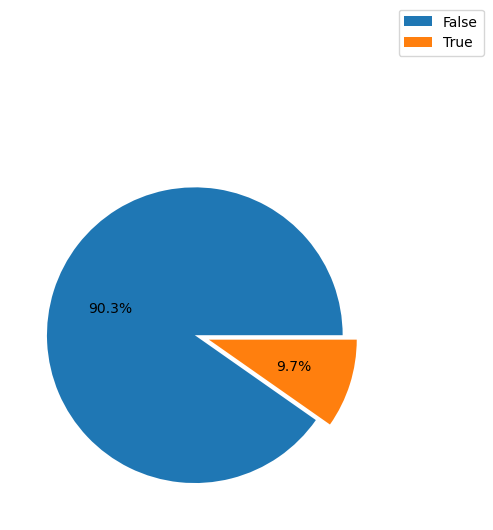

In [141]:
pc = cdf.groupby(['hazardous']).size().reset_index(name='counts')
piechart = plt.pie(a['counts'],
                  radius = 1.0,
                  autopct='%1.1f%%',
                  explode=[0.0, 0.1])
plt.legend(labels=a['hazardous'], bbox_to_anchor=(1.3, 1.4))

## Finding the Average Diameter and Adding Column

In order to determine the fastest and brightest object and their relationship with diameter, the average of the minimum and maximum diameter is computed and added to the dataset as a new column.

In [129]:
average = (cdf['est_diameter_min'] + cdf['est_diameter_max']) / 2
cdf['est_average_diameter'] = average
av = cdf.pop('est_average_diameter')
cdf.insert(4, 'est_average_diameter', av)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17735 entries, 3 to 90439
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    17735 non-null  int64  
 1   name                  17735 non-null  object 
 2   est_diameter_min      17735 non-null  float64
 3   est_diameter_max      17735 non-null  float64
 4   est_average_diameter  17735 non-null  float64
 5   relative_velocity     17735 non-null  float64
 6   miss_distance         17735 non-null  float64
 7   orbiting_body         17735 non-null  object 
 8   sentry_object         17735 non-null  bool   
 9   absolute_magnitude    17735 non-null  float64
 10  hazardous             17735 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 1.4+ MB


## Scatter Plot to Show Relationship Between Average Diameter and Velocity

After cleaning the dataset, a new scatter plot is created in order to determine whether there is a relationship between the diameter of an object and its velocity.

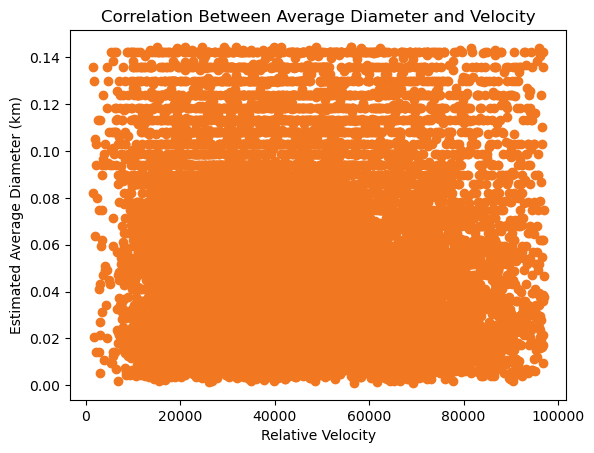

In [143]:
plt.xlabel("Relative Velocity")
plt.ylabel("Estimated Average Diameter (km)")
plt.title("Correlation Between Average Diameter and Velocity")
plt.scatter(cdf['relative_velocity'],
           cdf['est_average_diameter'],
           color = "#F17720")

## Scatter Plot to Show Relationship Between Average Diameter and Distance Missed

After cleaning the dataset, a new scatter plot is created in order to determine whether there is a relationship between the diameter of an object and its distance missed.

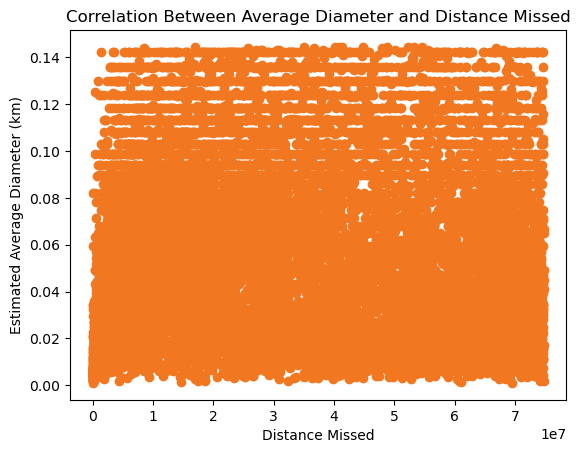

In [144]:
plt.xlabel("Distance Missed")
plt.ylabel("Estimated Average Diameter (km)")
plt.title("Correlation Between Average Diameter and Distance Missed")
plt.scatter(cdf['miss_distance'],
           cdf['est_average_diameter'],
           color = "#F17720")

## Sorting Values to Determine 10 Fastest Objects

It is made evident that there is no correlation between the size of the object and the speed at which it is orbiting the Earth.

In [131]:
sorted_df = cdf.sort_values(by='relative_velocity', ascending=False)
print('Top 10 Fastest Objects\n', 
      sorted_df[['name', 'est_average_diameter', 'relative_velocity']].head(10))

Top 10 Fastest Objects
               name  est_average_diameter  relative_velocity
566    (2010 GM23)              0.046724       96964.808179
76585   (2020 DC1)              0.037458       96946.493606
48397    (2019 PJ)              0.074738       96920.983887
17738  (2015 HD10)              0.021555       96868.746115
37557   (2017 QN2)              0.009409       96866.531440
76954    (2020 EV)              0.142411       96850.084973
55836   (2021 VF5)              0.038507       96827.051181
3224     (2015 CL)              0.035772       96802.887693
15607   (2022 BF1)              0.038154       96758.322103
57872   (2019 HS3)              0.017122       96757.583067


## Sorting Values to Determine 10 Brightest Objects

It is made evident that there is no correlation between the size of the object and the brightness of the object.

In [130]:
sorted_df = cdf.sort_values(by='absolute_magnitude', ascending=False)
print('Top 10 Brightest Objects\n', 
      sorted_df[['name', 'est_average_diameter', 'absolute_magnitude']].head(10))

Top 10 Brightest Objects
               name  est_average_diameter  absolute_magnitude
24949  (2008 TS26)              0.000985              33.200
45661    (2021 BO)              0.001105              32.950
26278    (2020 CW)              0.001323              32.560
24129   (2019 AS5)              0.001491              32.300
25143   (2008 UM1)              0.001635              32.100
12455   (2011 CQ1)              0.001635              32.100
18032   (2017 UL6)              0.001712              32.000
10616  (2019 UN13)              0.001712              32.000
48579  (2022 AV13)              0.001860              31.820
50480  (2017 WE30)              0.001865              31.814


## Key Findings

1) There is no correlation between diameter and velocity.
2) There is no correlation between diameter and distance missed
3) The vast majority (90.3%) of objects are not hazardous.
4) The sizes of the top 10 fastest objects range between 0.021555 and 0.142411 kilometers.
5) The sizes of the top 10 brightest objects range between 0.0.000985 and 0.001865 kilometers.

## Conclusion

The vast majority of the objects orbiting Earth are very small and are insignificant to the safety of the planet. There is also no correlation between the size of an object and its velocity or brightness. Additionally, one can conclude that the objects around Earth are nonsignificant, and that there is no reason to worry about them.